In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs2/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs2/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_5',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_5',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.5_.5_.6_.7_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_5e-25',
                          'crd_a3d1611',
                          'atmpro_trp')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_5',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_5',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.5_.5_.6_.7_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_5e-25',
                          'crd_a3d1611',
                          'atmpro_trp')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 300.0

ng = 5

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 5 /)

data wgt
     &     /.5, .5, .6, .7, .9/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 5e-25

include 'trp75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

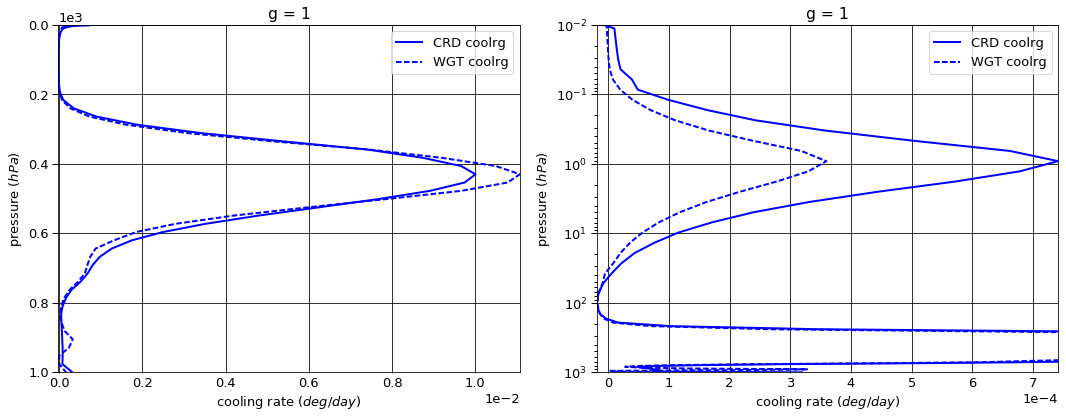

# Figure: cooling rate g-group 2

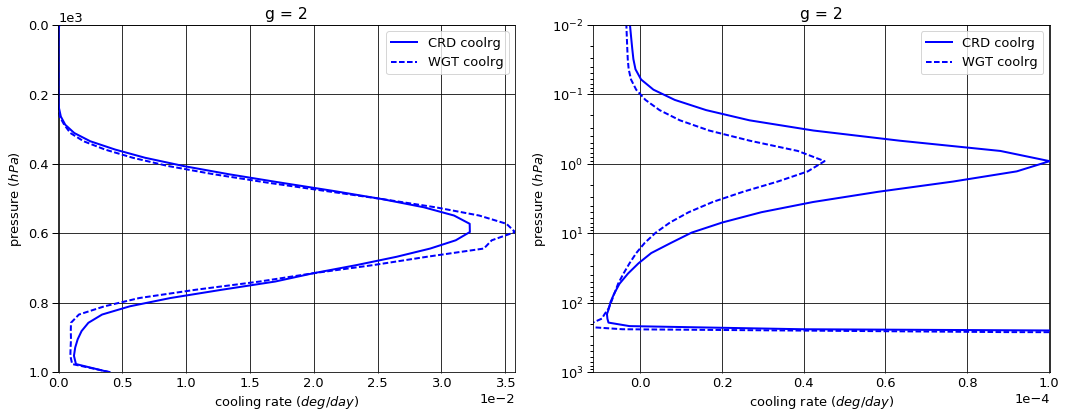

# Figure: cooling rate g-group 3

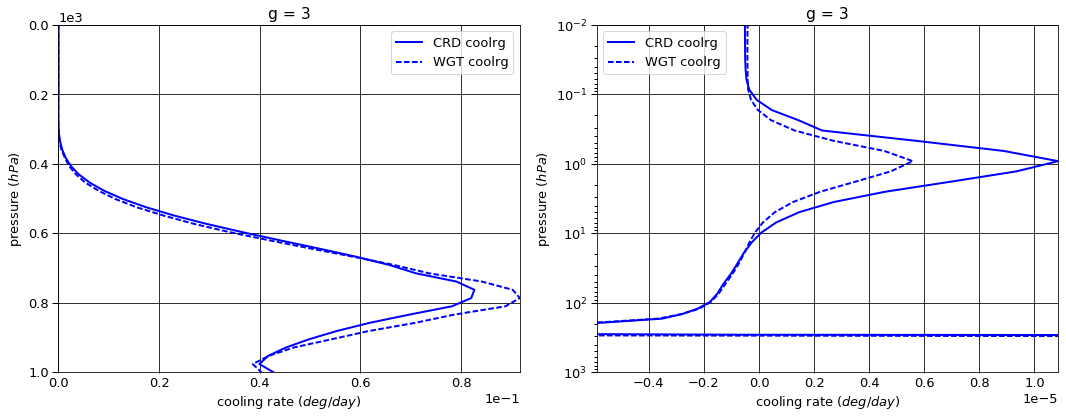

# Figure: cooling rate g-group 4

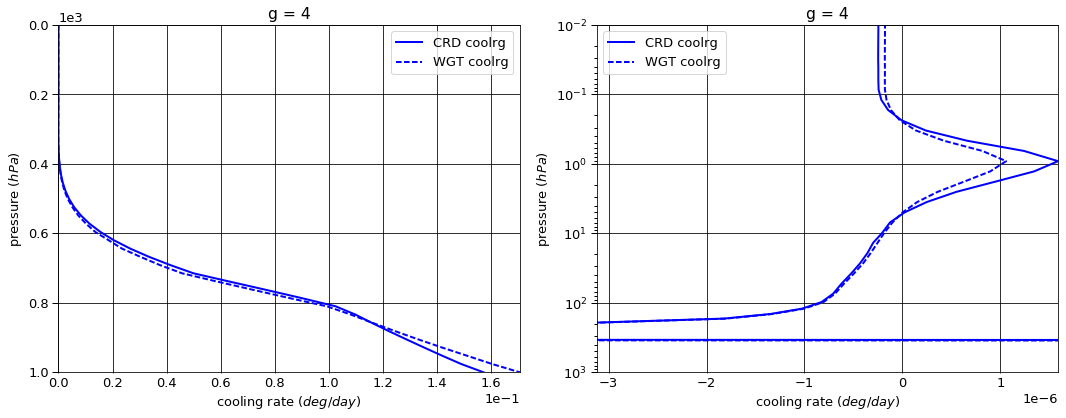

# Figure: cooling rate g-group 5

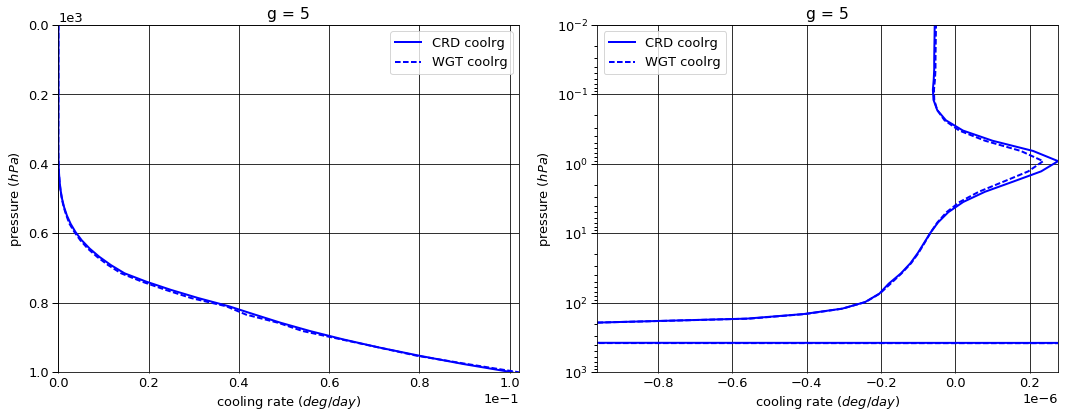

# Figure: cooling rate g-group total

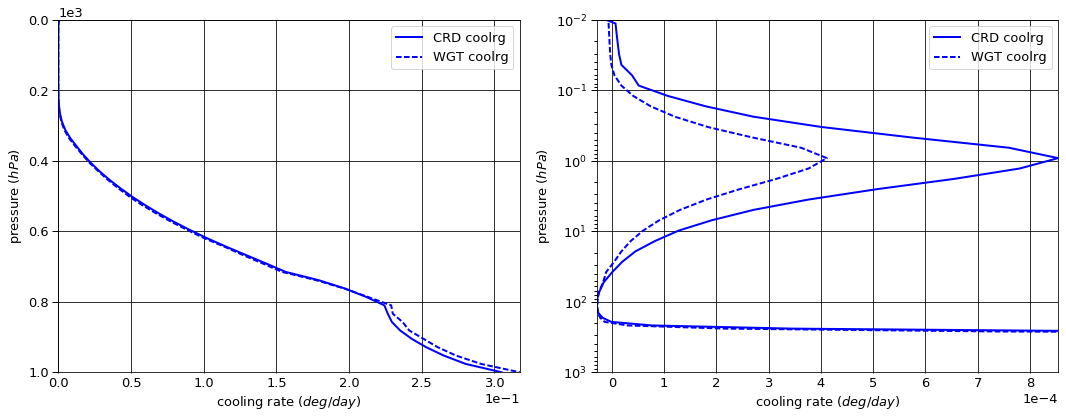

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.278684  0.000000  -0.278684
  1013.0   76     -0.544363  0.543561  -0.000802
2 0.0      1      -1.190255  0.000000  -1.190255
  1013.0   76     -1.825069  1.812514  -0.012555
3 0.0      1      -3.661793  0.000000  -3.661793
  1013.0   76     -4.519021  4.133275  -0.385745
4 0.0      1      -9.481777  0.000000  -9.481777
  1013.0   76    -10.198932  5.266770  -4.932162
5 0.0      1     -17.880451  0.000000 -17.880451
  1013.0   76    -18.136125  2.297678 -15.838447


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.277373  0.000000  -0.277373
  1013.0   76     -0.544363  0.543900  -0.000463
2 0.0      1      -1.189390  0.000000  -1.189390
  1013.0   76     -1.825069  1.813424  -0.011645
3 0.0      1      -3.653165  0.000000  -3.653165
  1013.0   76     -4.519021  4.268703  -0.250318
4 0.0      1      -9.509005  0.000000  -9.509005
  1013.0   76    -10.198932  5.257239  -4.941693
5 0.0      1     -17.888199  0.000000 -17.888199
  1013.0   76    -18.136125  2.260026 -15.876099


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.001311  0.000000  0.001311
  1013.0   76     0.000000  0.000339  0.000339
2 0.0      1      0.000866  0.000000  0.000866
  1013.0   76     0.000000  0.000910  0.000910
3 0.0      1      0.008628  0.000000  0.008628
  1013.0   76     0.000000  0.135428  0.135428
4 0.0      1     -0.027228  0.000000 -0.027228
  1013.0   76     0.000000 -0.009531 -0.009531
5 0.0      1     -0.007748  0.000000 -0.007748
  1013.0   76     0.000000 -0.037652 -0.037652

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -3.149115e-06
  1001.112500 75     3.192633e-04
2 0.000312    1     -4.129522e-06
  1001.112500 75     4.010527e-03
3 0.000312    1     -5.062637e-07
  1001.112500 75     4.273382e-02
4 0.000312    1     -2.342310e-07
  1001.112500 75     1.572941e-01
5 0.000312    1     -5.163505e-08
  1001.112500 75     1.006385e-01


WGT


coolrg
g pressure    layer              
1 0.000312    1     -8.385812e-06
  1001.112500 75     1.656035e-04
2 0.000312    1     -4.038152e-06
  1001.112500 75     4.100842e-03
3 0.000312    1     -3.916339e-07
  1001.112500 75     4.033201e-02
4 0.000312    1     -1.685224e-07
  1001.112500 75     1.707124e-01
5 0.000312    1     -4.817671e-08
  1001.112500 75     1.021300e-01


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -5.236697e-06
  1001.112500 75    -1.536599e-04
2 0.000312    1      9.137000e-08
  1001.112500 75     9.031530e-05
3 0.000312    1      1.146298e-07
  1001.112500 75    -2.401812e-03
4 0.000312    1      6.570861e-08
  1001.112500 75     1.341835e-02
5 0.000312    1      3.458347e-09
  1001.112500 75     1.491530e-03

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-32.49296,0.000000,-32.492960
1013.0,76,-35.22351,14.053799,-21.169711



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-32.517131,0.000000,-32.517131
1013.0,76,-35.223510,14.143293,-21.080217



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.024172,0.000000,-0.024172
1013.0,76,0.000000,0.089494,0.089494


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000008
1001.112500,75,0.304996



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000013
1001.112500,75,0.317441



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000005
1001.112500,75,0.012445


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.015500,0.015423
2,0.052000,0.051652
3,0.128688,0.127952
4,0.290063,0.289068
5,0.513750,0.515905


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.501949e-22
2,2.243039e-23
3,3.349798e-24
4,5.002654e-25
5,3.765264e-26


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [5]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.501949e-22,NaN,0.015500,0.015423,0.015500,0.015423,600.0
2,2.243039e-23,0.149342,0.052000,0.051652,0.067500,0.067075,600.0
3,3.349798e-24,0.149342,0.128688,0.127952,0.196188,0.195027,600.0
4,5.002654e-25,0.149342,0.290063,0.289068,0.486250,0.484095,600.0
5,3.765264e-26,0.075265,0.513750,0.515905,1.000000,1.000000,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  2.361595e-22  7.723004e-24  30.578705
      2     0.000312  1.063151e-23  2.631985e-25  40.393529
      3     0.000312  2.016399e-25  1.411261e-26  14.287920
      4     0.000312  2.490977e-26  2.765614e-27   9.006959
      5     0.000312  2.836060e-27  1.686420e-28  16.817041
2     1     0.000750  2.378870e-22  7.742215e-24  30.725956
      2     0.000750  1.069036e-23  2.642800e-25  40.450865
      3     0.000750  2.042120e-25  1.415346e-26  14.428419
      4     0.000750  2.514372e-26  2.779934e-27   9.044716
      5     0.000750  2.864847e-27  1.695206e-28  16.899706
3     1     0.001052  2.414276e-22  7.778543e-24  31.037643
      2     0.001052  1.081128e-23  2.663691e-25  40.587606
      3     0.001052  2.095281e-25  1.422932e-26  14.725095
      4     0.001052  2.562480e-26  2.808327e-27   9.124578
      5     0.001052  2.924167e-27  1.712004e-28  17.080378
4     1     0.001476  2.450658e-22  7.815744e-24  31.355407
      2     0.001476  1.093598e-23  2.685378e-25  40.724175
      3     0.001476  2.150623e-25  1.430489e-26  15.034177
      4     0.001476  2.612304e-26  2.837593e-27   9.206057
      5     0.001476  2.985787e-27  1.729437e-28  17.264502
5     1     0.002070  2.487534e-22  7.853565e-24  31.673952
      2     0.002070  1.106284e-23  2.707696e-25  40.857006
      3     0.002070  2.207465e-25  1.437965e-26  15.351308
      4     0.002070  2.663224e-26  2.867441e-27   9.287806
      5     0.002070  3.048946e-27  1.747406e-28  17.448414
6     1     0.002904  2.524893e-22  7.892333e-24  31.991723
      2     0.002904  1.119184e-23  2.730824e-25  40.983364
      3     0.002904  2.265825e-25  1.445430e-26  15.675781
      4     0.002904  2.715257e-26  2.897995e-27   9.369435
      5     0.002904  3.113672e-27  1.766076e-28  17.630455
7     1     0.004074  2.562729e-22  7.932545e-24  32.306518
      2     0.004074  1.132298e-23  2.755019e-25  41.099463
      3     0.004074  2.325733e-25  1.452991e-26  16.006523
      4     0.004074  2.768436e-26  2.929433e-27   9.450413
      5     0.004074  3.180007e-27  1.785683e-28  17.808346
8     1     0.005714  2.601057e-22  7.974931e-24  32.615423
      2     0.005714  1.145637e-23  2.780665e-25  41.200099
      3     0.005714  2.387259e-25  1.460803e-26  16.342101
      4     0.005714  2.822831e-26  2.962033e-27   9.530047
      5     0.005714  3.248045e-27  1.806573e-28  17.979038
9     1     0.008015  2.639853e-22  8.020489e-24  32.913865
      2     0.008015  1.159194e-23  2.808274e-25  41.277791
      3     0.008015  2.450411e-25  1.469082e-26  16.679881
      4     0.008015  2.878470e-26  2.996145e-27   9.607245
      5     0.008015  3.317821e-27  1.829209e-28  18.138006
10    1     0.011243  2.679111e-22  8.070664e-24  33.195671
      2     0.011243  1.172972e-23  2.838595e-25  41.322259
      3     0.011243  2.515238e-25  1.478138e-26  17.016260
      4     0.011243  2.935423e-26  3.032293e-27   9.680537
      5     0.011243  3.389429e-27  1.854264e-28  18.279112
11    1     0.015771  2.718813e-22  8.127487e-24  33.452081
      2     0.015771  1.186971e-23  2.872683e-25  41.319237
      3     0.015771  2.581778e-25  1.488410e-26  17.345881
      4     0.015771  2.993766e-26  3.071214e-27   9.747827
      5     0.015771  3.462970e-27  1.882681e-28  18.393818
12    1     0.022122  2.758938e-22  8.193822e-24  33.670959
      2     0.022122  1.201190e-23  2.912033e-25  41.249189
      3     0.022122  2.650076e-25  1.500517e-26  17.661084
      4     0.022122  3.053607e-26  3.113958e-27   9.806191
      5     0.022122  3.538579e-27  1.915803e-28  18.470473
13    1     0.031031  2.799590e-22  8.273802e-24  33.836807
      2     0.031031  1.215677e-23  2.958841e-25  41.086261
      3     0.031031  2.720412e-25  1.515354e-26  17.952320
      4     0.031031  3.115282e-26  3.162123e-27   9.851868
      5     0.031031  3.616690e-27  1.955591e-28  18

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
